### Script compiles temperature logs from several wells into a single dataframe to study temperature and geothermal gradeints at different depth

In [2]:
import lasio
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Compile logs from individual wells into a single dataframe

file_list = [f for f in glob.glob('*.las')]
counter = -1
for i in file_list:
    counter +=1
    if counter == 0:
        las = lasio.read(i)
        df_agg = las.df()  
        continue
    else:
        las = lasio.read(i)
        df = las.df()
        df_agg = df_agg.append(df)
    print(df_agg.shape)

(100002, 2)
(150003, 2)
(200004, 2)
(250005, 2)
(300006, 2)
(350007, 2)
(400008, 2)
(450009, 2)
(500010, 2)
(550011, 2)
(600012, 2)
(650013, 2)
(700014, 2)
(750015, 2)
(800016, 2)
(850017, 2)
(900018, 2)
(950019, 2)
(1000020, 2)
(1050021, 2)
(1100022, 2)
(1150023, 2)
(1200024, 2)
(1250025, 2)
(1300026, 2)
(1350027, 2)


In [4]:
#Procees aggregated dataframe, drop missing values and redundant data

df_agg['SSTVD'] = -1*df_agg.index
df_agg['TGRAD_degC_km'] = 10000*df_agg['TGRAD']

df_agg.replace(-9999.25, np.nan, inplace=True)
df_agg.dropna(axis=0, inplace=True)
df_agg.head()

df_upper = df_agg[(df_agg['SSTVD']<0) & (df_agg['SSTVD']>=-1500)]
df_lower = df_agg[(df_agg['SSTVD']<-1500) & (df_agg['SSTVD']>=-3500)]

df_upper['Counter'] = range(0,df_upper.shape[0])
df_upper.set_index('Counter', inplace=True)
lst = list(range(0,df_upper.shape[0]))
list_drop = [i for i in lst if i%5!=0]
df_upper.drop(list_drop, axis=0, inplace=True)

df_agg_fin = df_upper.append(df_lower)
df_agg_fin.shape

(105133, 4)

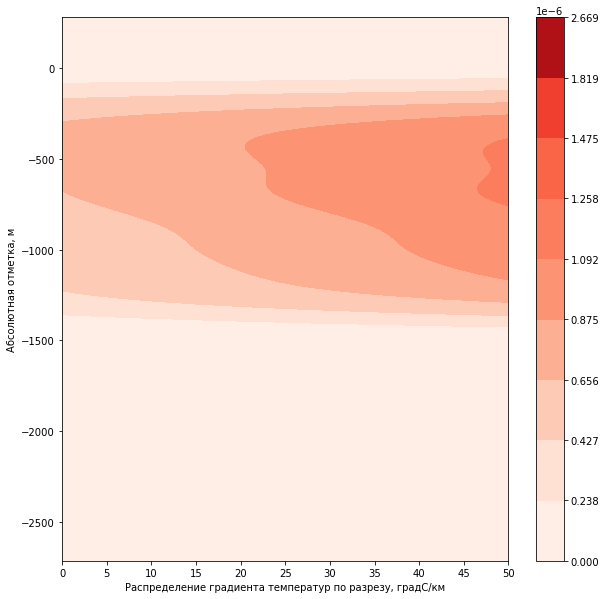

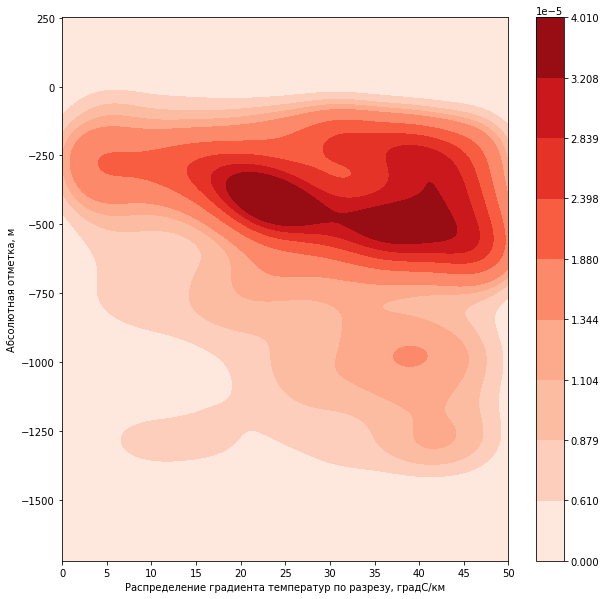

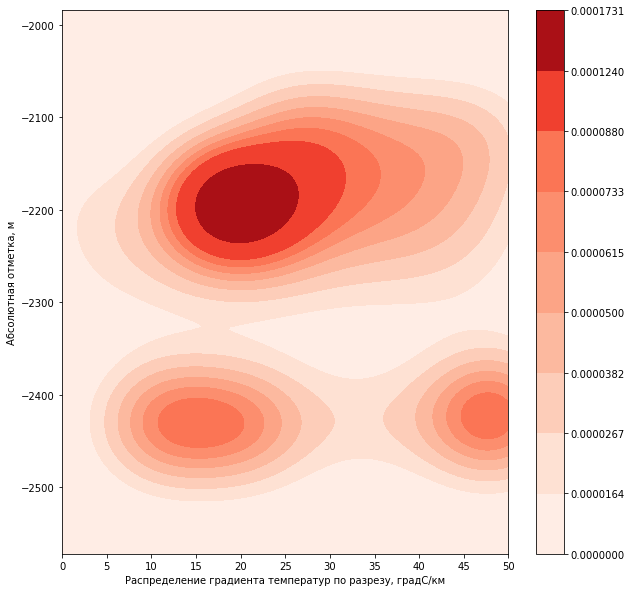

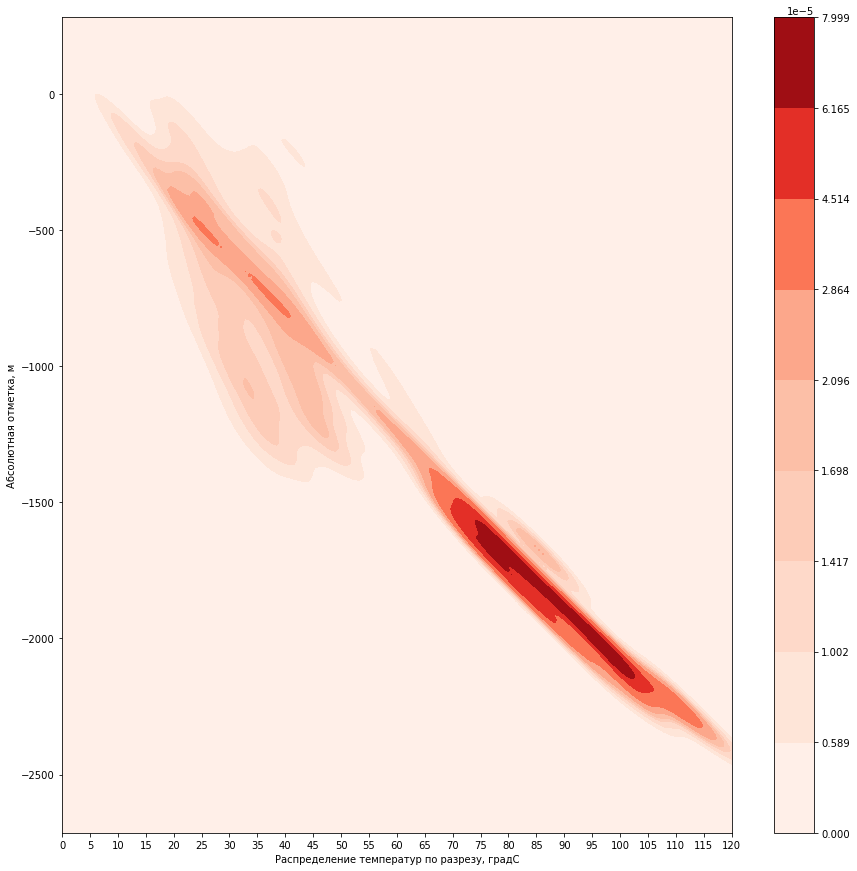

In [9]:
#Split the dataframe into upper and lower sratigraphic sections and do plotting

df_filt = df_agg_fin[(df_agg_fin['TGRAD_degC_km']>0.5)]
df_filt_upper = df_agg_fin[(df_agg_fin['TGRAD_degC_km']>0.5) & (df_agg_fin['TGRAD_degC_km']<50) & (df_agg_fin['SSTVD']>-1500)]
df_filt_lower = df_agg_fin[(df_agg_fin['TGRAD_degC_km']>0.5) & (df_agg_fin['TGRAD_degC_km']<50) & (df_agg_fin['SSTVD']<=-1500)]


plt.figure(figsize = (10.0,10.0))
sns.kdeplot(x = df_filt['TGRAD_degC_km'], y = df_filt['SSTVD'],cmap="Reds", shade=True, thresh=0,cbar = True)
plt.xlim(0,50)
plt.xticks(np.linspace(0,50,11))
plt.xlabel('Распределение градиента температур по разрезу, градС/км')
plt.ylabel('Абсолютная отметка, м')
plt.savefig('Градиент общий.jpeg')


plt.figure(figsize = (10.0,10.0))
sns.kdeplot(x = df_filt_upper['TGRAD_degC_km'], y = df_filt_upper['SSTVD'],cmap="Reds", shade=True, thresh=0, cbar=True)
plt.xlim(0,50)
plt.xticks(np.linspace(0,50,11))
plt.xlabel('Распределение градиента температур по разрезу, градС/км')
plt.ylabel('Абсолютная отметка, м')
plt.savefig('Градиент Викуловка.jpeg')

plt.figure(figsize = (10.0,10.0))
sns.kdeplot(x = df_filt_lower['TGRAD_degC_km'], y = df_filt_lower['SSTVD'],cmap="Reds", shade=True, thresh=0, cbar=True)
plt.xlim(0,50)
plt.xticks(np.linspace(0,50,11))
plt.xlabel('Распределение градиента температур по разрезу, градС/км')
plt.ylabel('Абсолютная отметка, м')
plt.savefig('Градиент Бажен.jpeg')


plt.figure(figsize = (15.0,15.0))
sns.kdeplot(x = df_filt['TEMP'], y = df_filt['SSTVD'],cmap="Reds", shade=True, thresh=0, cbar=True)
plt.xlim(0,50)
plt.xticks(np.linspace(0, 120,25))
plt.xlabel('Распределение температур по разрезу, градС')
plt.ylabel('Абсолютная отметка, м')
plt.savefig('Температуры общие.jpeg')
